In [1]:
!pip install kaggle --upgrade

    100% |████████████████████████████████| 61kB 5.6MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 6.9MB/s ta 0:00:011
  Stored in directory: /Users/jordanvalansi/Library/Caches/pip/wheels/ee/97/c5/87dcdc9434fe4e632ed5945e31a03703af229db178ef6a00e8
  Stored in directory: /Users/jordanvalansi/Library/Caches/pip/wheels/16/7f/c3/6b0582283ad589d68a306da924a78c74546e010d8106b9b3a9
Successfully built kaggle python-slugify
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import kaggle

In [10]:
kaggle.api.authenticate()

In [17]:
kaggle.api.dataset_list('votes')

[mlg-ulb/creditcardfraud,
 hugomathien/soccer,
 ronitf/heart-disease-uci,
 lava18/google-play-store-apps,
 tmdb/tmdb-movie-metadata,
 zynicide/wine-reviews,
 START-UMD/gtd,
 mczielinski/bitcoin-historical-data,
 mehdidag/black-friday,
 karangadiya/fifa19,
 datasnaek/youtube-new,
 abcsds/pokemon,
 russellyates88/suicide-rates-overview-1985-to-2016,
 borismarjanovic/price-volume-data-for-all-us-stocks-etfs,
 unsdsn/world-happiness,
 uciml/iris,
 rounakbanik/the-movies-dataset,
 worldbank/world-development-indicators,
 wendykan/lending-club-loan-data,
 mohansacharya/graduate-admissions]

In [24]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('data/^GSPC.csv')

In [22]:
df['Adj Close Diff'] = df['Adj Close']/df['Adj Close'].shift()

In [25]:
df['Log Adj Close Diff'] = np.log(df['Adj Close Diff'])

In [34]:
np.exp(df['Log Adj Close Diff'].mean())**12

1.0766989707555843

In [48]:
1.03**(1/12)

1.0024662697723037

In [76]:
# What happens if every <period> I either:
# * put the excess revenue (over average revenue) and put in safe investment (3%) or 
# * put funds from the safe investment to reach average revenue
class State():
    def __init__(self, price):
        self.invest = price
        self.invest_history = [self.invest]
        self.safe = 0
        self.safe_history = [self.safe]

    def sell(self, revenue, expected_revenue):
        # put excess revenue in safe
        excess_revenue = expected_revenue - revenue
        self.invest -= excess_revenue
        self.safe += excess_revenue

    def buy(self, revenue, expected_revenue):
        # put funds in investment
        funds = expected_revenue - revenue
        self.invest += funds
        self.safe -= funds
        


def smoothify(prices):
    diffs = prices/prices.shift()
    av = np.exp(np.mean(np.log(diffs)))
    print(av)
    state = State(prices[0])
    for diff,price in zip(diffs[1:],prices[1:]):
        print('----------')
        print(price)
        expected_revenue = state.invest*av - state.invest
        print(expected_revenue)
        revenue = state.invest*diff - state.invest
        print(revenue)
        state.invest *= av
        print(state.invest)
        state.invest_history.append(state.invest)
        state.safe *= 1.0024
        print(state.safe)
        state.safe_history.append(state.safe)
        excess_revenue = expected_revenue - revenue
        state.safe += excess_revenue

    return state
            
state = smoothify(df['Adj Close'])
        
            

1.0061773224372066
----------
17.219998999999998
0.10532334137705135
0.16999999999999815
17.15532234137705
0.0
----------
17.290001
0.1059739576169001
0.06973907922649047
17.26129629899395
-0.06483188260364187
----------
18.07
0.10662859292304816
0.7787040528175204
17.367924891917
-0.028665637023344
----------
18.780001000000002
0.10728727212255862
0.6824152762139484
17.475212164039558
-0.702422875550419
----------
17.690001000000002
0.10795002019586875
-1.014269448590717
17.583162184235427
-1.2806170017529492
----------
17.84
0.10861686227772083
0.14909308057546866
17.691779046513147
-0.15877768704548265
----------
18.42
0.1092878236581285
0.5751811573417989
17.801066870171276
-0.19973211471605423
----------
19.450001
0.10996292978332534
0.995391784872055
17.9110297999546
-0.6672229494758839
----------
19.530001000000002
0.11064220625673471
0.07367004166202307
18.021672006211336
-1.5563781688955687
----------
19.51
0.11132567883994682
-0.01845629510189184
18.132997685051283
-1.5230525

5.17570584924421
110.18066260965196
33.83800156936704
----------
91.150002
0.6806214792848948
4.859054138480346
110.86128408893686
29.409151566292287
----------
95.190002
0.6848258976201294
4.913654173252837
111.54610998655698
25.291272632473866
----------
88.75
0.6890562880030728
-7.546561154664616
112.23516627456006
21.112994223297576
----------
86.879997
0.693312810871447
-2.3648461705794546
112.9284790854315
29.41904833396358
----------
83.870003
0.6975956276540529
-3.912454606510579
113.62607471308556
32.555152612971476
----------
89.040001
0.701904900776853
7.004251317536074
114.32797961386241
37.25439933396923
----------
91.239998
0.7062407936692097
2.824811425671001
115.03422040753162
31.026337844211312
----------
90.190002
0.7106034707700104
-1.3238215030542335
115.74482387830163
28.977145853518824
----------
100.860001
0.7149930975339629
13.693282266882008
116.4598169758356
31.08599859732869
----------
99.709999
0.7194098404378053
-1.32787052462794
117.1792268162734
18.151167

1238.329956
3.936816984629104
-20.57372630006887
641.2383379344317
-542.3297991138242
----------
1286.369995
3.9611359725194006
24.876338179018603
645.1994739069511
-519.062022043116
----------
1335.180054
3.9856051866393045
24.481466849020535
649.1850790935904
-541.2731695878143
----------
1301.839966
4.010225554984572
-16.210463600340177
653.195304648575
-563.117276925196
----------
1372.709961
4.034998011283619
35.5588622130748
657.2303026598586
-544.199539580519
----------
1328.719971
4.059923495032876
-21.061662888089245
661.2902261548915
-577.1051399513876
----------
1320.410034
4.085002951532033
-4.135769942501156
665.3752291064235
-553.3083140968293
----------
1282.709961
4.11023733192053
-18.997655322046626
669.485466438344
-546.3957513016828
----------
1362.930054
4.135627593213258
41.86931419629957
673.6210940315573
-524.5437495084701
----------
1388.910034
4.161174698336822
12.840470058721053
677.7822687298941
-563.6269019582242
----------
1469.25
4.186879616165925
39.20556

In [54]:
s = pd.Series(state.invest_history)

In [57]:
(s/s.shift()).mean()

1.0073912167677508

In [59]:
s_safe = pd.Series(state.safe_history)

In [78]:
import matplotlib.pyplot as plt

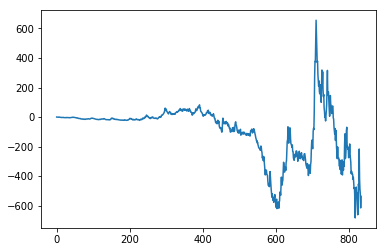

In [79]:
plt.plot(state.safe_history)